https://www.youtube.com/watch?v=V0u6bxQOUJ8

# Predictive Modeling

Predict whether an individual makes > $50k per year based on census data

https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data

colnames = 'age workclass fnlwgt education education-num marital-status occupation relationship race sex capital-gain capital-loss hours-per-week native-country income'.split()

df = pd.read_csv('adult.data.csv', names = colnames, header=None)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# remove whitespace from df['income']

def rm_space(data):
    data = data.strip()
    return data

df['income'] = df.income.map(rm_space)

In [4]:
print(df['income'].value_counts())

# I had trouble getting the accurate str value due to Capital letters and Whitespace.
# Here is a method for directly pulling the str value
print(df['income'].value_counts().index[1])

<=50K    24720
>50K      7841
Name: income, dtype: int64
>50K


In [5]:
# Create boolean target column
df['target'] = (df['income'] == '>50K')

# can also be done with list comprehension:s
# df['target'] = [0 if x == '<=50K' else 1 for x in df['income']]

In [6]:
df['target'].value_counts()

False    24720
True      7841
Name: target, dtype: int64

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False


In [8]:
# Assign a Dataframe of Features, X, and a Series of the outcome variable, y
X = df.drop(['income', 'target'], axis=1)
y = df.target

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [10]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: target, dtype: bool

In [11]:
y.value_counts()

False    24720
True      7841
Name: target, dtype: int64

## Basic Data Cleaning

### Dealing with Data Types

1. Numeric (income, age)
2. Categorical (gender, nationality)
3. Ordinal (low/med/high)

Computers can only handle numeric features

Must Convert
- Create Dummy Variables
- Categorical, Ordinal Feature --> Many dummy column Features

In [12]:
# See Categorical variable: Education
X['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [13]:
# explore pandas get_dummies
print(pd.get_dummies(X['education'].head(5)))

    11th   Bachelors   HS-grad
0      0           1         0
1      0           1         0
2      0           0         1
3      1           0         0
4      0           1         0


In [14]:
# Decide which categorical variables you want to use in the model
def unique_categories(DataFrame):
    for DataFrame_col in DataFrame.columns:
        if DataFrame[DataFrame_col].dtype == 'object':
            unique_cat = len(DataFrame[DataFrame_col].unique())
            print("Column --", DataFrame_col, "-- has ", unique_cat, " unique categories")
unique_categories(X)

Column -- workclass -- has  9  unique categories
Column -- education -- has  16  unique categories
Column -- marital-status -- has  7  unique categories
Column -- occupation -- has  15  unique categories
Column -- relationship -- has  6  unique categories
Column -- race -- has  5  unique categories
Column -- sex -- has  2  unique categories
Column -- native-country -- has  42  unique categories


### Handle 'native-country'

In [15]:
# native-country has many categories, but most are 'U.S.'
# we can make just two bins. 'U.S.' and 'other'. One column is needed for this.
X['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [16]:
X['native-country'].value_counts().index[0]

' United-States'

In [17]:
X['country-U.S.'] = (X['native-country'] == X['native-country'].value_counts().index[0])

In [18]:
X['country-U.S.'].value_counts()

True     29170
False     3391
Name: country-U.S., dtype: int64

In [19]:
X.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,country-U.S.
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,True


In [20]:
X = X.drop('native-country', axis=1)
X.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country-U.S.
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,True


## Handling Categorical to dummy

In [21]:
# Create a list of features to dummy
def column_objects(df):
    # return a list of columns with dtype object
    object_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            object_cols.append(col)
    return object_cols

todummy_list = column_objects(X)
todummy_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [22]:
type(todummy_list)

list

In [23]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country-U.S.
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,False


In [24]:
def make_dummies(df, todummy_list):
    for s in todummy_list:
        new_dummies = pd.get_dummies(df[s], prefix=s)
        df.drop(s, axis=1, inplace=True)
        df = pd.concat([df, new_dummies], axis=1)
    return df

X = make_dummies(X, todummy_list)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,country-U.S.,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,True,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,True,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,True,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,True,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,False,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age                                    32561 non-null  int64
 1   fnlwgt                                 32561 non-null  int64
 2   education-num                          32561 non-null  int64
 3   capital-gain                           32561 non-null  int64
 4   capital-loss                           32561 non-null  int64
 5   hours-per-week                         32561 non-null  int64
 6   country-U.S.                           32561 non-null  bool 
 7   workclass_ ?                           32561 non-null  uint8
 8   workclass_ Federal-gov                 32561 non-null  uint8
 9   workclass_ Local-gov                   32561 non-null  uint8
 10  workclass_ Never-worked                32561 non-null  uint8
 11  workclass_ Private          

We have successfully converted categorical to dummy

In [26]:
X['country-U.S.'].value_counts()

True     29170
False     3391
Name: country-U.S., dtype: int64

In [27]:
# make 'country-U.S.' into uint8
X['country-U.S.'] = X['country-U.S.'].astype('uint8')
X['country-U.S.'].value_counts()

1    29170
0     3391
Name: country-U.S., dtype: int64

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age                                    32561 non-null  int64
 1   fnlwgt                                 32561 non-null  int64
 2   education-num                          32561 non-null  int64
 3   capital-gain                           32561 non-null  int64
 4   capital-loss                           32561 non-null  int64
 5   hours-per-week                         32561 non-null  int64
 6   country-U.S.                           32561 non-null  uint8
 7   workclass_ ?                           32561 non-null  uint8
 8   workclass_ Federal-gov                 32561 non-null  uint8
 9   workclass_ Local-gov                   32561 non-null  uint8
 10  workclass_ Never-worked                32561 non-null  uint8
 11  workclass_ Private          

## Handle Missing Data

imputation is usually better than just dropping

In [29]:
X.isnull().sum().sort_values(ascending=False).head(67)

age                              0
occupation_ Protective-serv      0
marital-status_ Never-married    0
marital-status_ Separated        0
marital-status_ Widowed          0
                                ..
education_ Masters               0
education_ Preschool             0
education_ Prof-school           0
education_ Some-college          0
sex_ Male                        0
Length: 67, dtype: int64

No missing data in this version of the dataset:
https://archive.ics.uci.edu/ml/datasets/Adult


If missing data was present, we could impute using below method:

In [41]:
# impute using SimpleImputer from sklearn.preprocessing
from sklearn.impute import SimpleImputer


/opt/anaconda3/bin/python


## More Data Exploration

### 2 approaches to Outlier Detection

1. Tukey's IQR
2. Kernel Density Estimation

### Outlier Detection - Tukey IQR
- Identifies extreme values in data
- Outliers -->  Q1 - 1.5(Q3-Q1) > x > Q3 + 1.5(Q3-Q1)
- Standard Deviation
    - This is also commonly used, but presents issues:
        - Assumes normality
        - Sensitive to very extreme values

In [42]:
def find_outliers_tukey(x):
    # finds outliers based on Tukey IQR
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    IQR = q3 - q1
    floor = q1 - 1.5*IQR
    ceiling = q3 + 1.5*IQR
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

inds, vals = find_outliers_tukey(X['age'])

In [45]:
print(np.sort(vals))

[79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 80 80
 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 81 81 81 81
 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 82 82 82 82 82 82 82 82
 82 82 82 82 83 83 83 83 83 83 84 84 84 84 84 84 84 84 84 84 85 85 85 86
 87 88 88 88 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90]


### Outlier detection - Kernel Density Estimation
- Non-parametric way to estimate the probability density function of a given feature
- can be advantageous compared to extreme value detection (e.g. Tukey IQR)
    - Captures outliers in bimodal distributions

In [47]:
# Commenting this whole block out bc not using it now but may be useful to look into
# statsmodels library and KDEUnivariate later

"""
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott', fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_val

kde_indices, kde_values = find_outliers_kde(X['age'])
print(np.sort(kde_values))
"""

"\nfrom sklearn.preprocessing import scale\nfrom statsmodels.nonparametric.kde import KDEUnivariate\n\ndef find_outliers_kde(x):\n    x_scaled = scale(list(map(float, x)))\n    kde = KDEUnivariate(x_scaled)\n    kde.fit(bw='scott', fft=True)\n    pred = kde.evaluate(x_scaled)\n    \n    n = sum(pred < 0.05)\n    outlier_ind = np.asarray(pred).argsort()[:n]\n    outlier_value = np.asarray(x)[outlier_ind]\n    \n    return outlier_ind, outlier_val\n\nkde_indices, kde_values = find_outliers_kde(X['age'])\nprint(np.sort(kde_values))\n"

## Distribution of Features

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

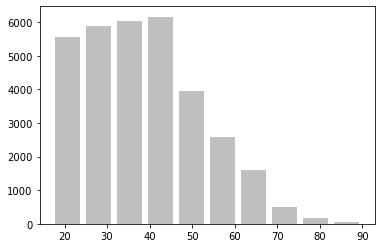

In [52]:
# Histogram of age

plt.hist(X['age'], color='gray', rwidth=0.8, alpha=0.5)
plt.show

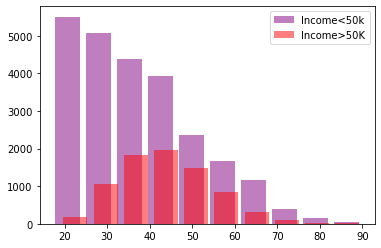

In [59]:
# Histogram of age and target
plt.hist(list(X['age'][y==0]), color='purple', rwidth=0.8, alpha=0.5, label='Income<50k')
plt.hist(list(X['age'][y==1]), color='red', rwidth=0.8, alpha=0.5, label='Income>50K')
plt.legend(loc='upper right')
plt.show()

## Feature Engineering

Increase/Decrease Dimensionality:
1. Interactions amongst features
    - can cause overfitting
    - computationally costly

In [65]:
# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df

In [66]:
X = add_interactions(X)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,country-U.S.,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,race_ Amer-Indian-Eskimo_sex_ Female,race_ Amer-Indian-Eskimo_sex_ Male,race_ Asian-Pac-Islander_sex_ Female,race_ Asian-Pac-Islander_sex_ Male,race_ Black_sex_ Female,race_ Black_sex_ Male,race_ Other_sex_ Female,race_ Other_sex_ Male,race_ White_sex_ Female,race_ White_sex_ Male
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'country-U.S.', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       ...
       'race_ Amer-Indian-Eskimo_sex_ Female',
       'race_ Amer-Indian-Eskimo_sex_ Male',
       'race_ Asian-Pac-Islander_sex_ Female',
       'race_ Asian-Pac-Islander_sex_ Male', 'race_ Black_sex_ Female',
       'race_ Black_sex_ Male', 'race_ Other_sex_ Female',
       'race_ Other_sex_ Male', 'race_ White_sex_ Female',
       'race_ White_sex_ Male'],
      dtype='object', length=1799)

### Dimensionality Reduction using PCA

Make less features

Principal Component Analysis: 
- uses linear combinations which maximize variants
- while ensuring zero correlation with previously calculated principal components
    - Cons: Makes the model harder to interpret

In [75]:
# Use PCA from sklearn.decomposition to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [77]:
X_pca.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-3.631343e+07,-1.623399e+07,-6.090975e+06,1.474592e+04,5.895021e+04,-41941.780996,2735.451048,30137.790466,-113280.425405,30198.315743
1,-2.048334e+08,-1.645420e+07,-6.697960e+06,2.217437e+06,3.098200e+05,32009.014435,-141876.834266,42993.332712,-42979.217010,17713.130168
2,-2.048297e+08,-1.638053e+07,1.615367e+06,6.845061e+04,-1.620689e+05,16098.505889,98032.642951,-125834.748325,-63924.714605,161234.111622
3,-2.048282e+08,-1.634992e+07,4.971616e+06,2.694578e+06,-9.007995e+05,13652.132421,-129064.095849,-41858.221229,23693.952902,8310.225382
4,-2.048275e+08,-1.633769e+07,6.407839e+06,-2.375276e+06,1.515101e+06,-49706.492374,-8642.034298,462789.570941,226118.952117,114645.316661


## Feature Selection and Model Building

In [79]:
# Use train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [80]:
# Too many features in X, from dummies

# This can cause overfitting and slow computing
print(df.shape)
print(X.shape)

(32561, 16)
(32561, 1799)


In [81]:
# Use Feature Selection to select the most important features

import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 542  543  635  638  642  808  839  844  846  853  856  978 1207 1208
 1336 1362 1422 1425 1427 1590] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [82]:
colnames_selected

['education-num',
 'marital-status_ Married-civ-spouse',
 'relationship_ Husband',
 'age_education-num',
 'age_marital-status_ Married-civ-spouse',
 'age_relationship_ Husband',
 'fnlwgt_marital-status_ Married-civ-spouse',
 'fnlwgt_relationship_ Husband',
 'education-num_hours-per-week',
 'education-num_marital-status_ Married-civ-spouse',
 'education-num_relationship_ Husband',
 'hours-per-week_marital-status_ Married-civ-spouse',
 'hours-per-week_relationship_ Husband',
 'country-U.S._marital-status_ Married-civ-spouse',
 'country-U.S._relationship_ Husband',
 'marital-status_ Married-civ-spouse_relationship_ Husband',
 'marital-status_ Married-civ-spouse_race_ White',
 'marital-status_ Married-civ-spouse_sex_ Male',
 'relationship_ Husband_race_ White',
 'relationship_ Husband_sex_ Male']

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [84]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.6354440727133813


## Now build model using unprocessed data

In [85]:
# Drop missing values
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(32561, 16)
(32561, 16)


In [86]:
df_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  target          32561 non-null  bool  
dtypes: bool(1), int64(6), object(9)
memory usage: 3.8+ MB


In [89]:
df_unprocessed['target'] = [int(i) for i in df_unprocessed['target']]
df_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  target          32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [92]:
# Drop non-numerical data

for col in df_unprocessed.columns:
    if df_unprocessed[col].dtypes not in ['int64']:
        df_unprocessed = df_unprocessed.drop(col, axis=1)


In [98]:
df_unprocessed.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target'],
      dtype='object')

In [99]:
# Split into features and outcomes
X_unprocessed = df_unprocessed.drop('target', axis=1)
y_unprocessed = df_unprocessed.target

In [100]:
X_train_unprocessed, X_test_unprocessed,  y_train, y_test = train_test_split(
X_unprocessed, y_unprocessed, train_size=0.7, random_state=1)


In [101]:
auc_unprocessed = find_model_perf(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
print(auc_unprocessed)

0.5799720952997741


In [104]:
dif = auc_processed/auc_unprocessed
print('model improvment of preprocessing: ', ((dif*100)-100))
print('unprocessed: ', auc_unprocessed)
print('processed: ', auc_processed)

model improvment of preprocessing:  9.56459420430133
unprocessed:  0.5799720952997741
processed:  0.6354440727133813
